In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image

from tensorflow.keras.optimizers.legacy import RMSprop

In [2]:
#Loading the data 

data = os.listdir(r"./digits" )
data_X = []     
data_y = []  
data_classes = len(data)
for i in range (0,data_classes):
    data_list = os.listdir(r"./digits" +"/"+str(i))
    for j in data_list:
        pic = cv2.imread(r"./digits" +"/"+str(i)+"/"+j)
        pic = cv2.resize(pic,(32,32))
        data_X.append(pic)
        data_y.append(i)

         
if len(data_X) == len(data_y) :
    print("Total Dataponits = ",len(data_X))

# Labels and images
data_X = np.array(data_X)
data_y = np.array(data_y)

Total Dataponits =  10160


In [4]:
data_X.shape

(10160, 32, 32, 3)

In [5]:
data_y.shape

(10160,)

In [ ]:
data_X[0]

In [13]:
#Spliting the train validation and test sets
train_X, test_X, train_y, test_y = train_test_split(data_X,data_y,test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

Training Set Shape =  (7721, 32, 32, 3)
Validation Set Shape =  (1931, 32, 32, 3)
Test Set Shape =  (508, 32, 32, 3)


In [14]:
# Preprocessing the images for neuralnet

def Prep(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #making image grayscale
    img = cv2.equalizeHist(img) #Histogram equalization to enhance contrast
    img = img/255 #normalizing
    return img

train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))

#Reshaping the images
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)

#Augmentation
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

In [15]:
# One hot encoding of the labels

train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

In [16]:
#Creating a Neural Network

model = Sequential()

model.add((Conv2D(60,(5,5),input_shape=(32, 32, 1) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 30)         0         
 2D)                                                    

In [20]:
#Compiling the model

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon = 1e-08, decay=0.0)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

#Fit the model

history = model.fit(datagen.flow(train_X, train_y, batch_size=32),
                              epochs = 30, validation_data = (valid_X, valid_y),
                              verbose = 2, steps_per_epoch= 200)

Epoch 1/30


C:\Users\sonaasat\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


200/200 - 19s - loss: 1.0453 - accuracy: 0.6478 - val_loss: 0.0990 - val_accuracy: 0.9684 - 19s/epoch - 96ms/step
Epoch 2/30
200/200 - 20s - loss: 0.2879 - accuracy: 0.9092 - val_loss: 0.0583 - val_accuracy: 0.9793 - 20s/epoch - 102ms/step
Epoch 3/30
200/200 - 21s - loss: 0.2098 - accuracy: 0.9332 - val_loss: 0.0442 - val_accuracy: 0.9824 - 21s/epoch - 105ms/step
Epoch 4/30
200/200 - 21s - loss: 0.1564 - accuracy: 0.9509 - val_loss: 0.0278 - val_accuracy: 0.9907 - 21s/epoch - 107ms/step
Epoch 5/30
200/200 - 21s - loss: 0.1402 - accuracy: 0.9584 - val_loss: 0.0248 - val_accuracy: 0.9927 - 21s/epoch - 106ms/step
Epoch 6/30
200/200 - 21s - loss: 0.1208 - accuracy: 0.9605 - val_loss: 0.0241 - val_accuracy: 0.9933 - 21s/epoch - 105ms/step
Epoch 7/30
200/200 - 21s - loss: 0.1110 - accuracy: 0.9666 - val_loss: 0.0294 - val_accuracy: 0.9917 - 21s/epoch - 106ms/step
Epoch 8/30
200/200 - 21s - loss: 0.1067 - accuracy: 0.9694 - val_loss: 0.0304 - val_accuracy: 0.9933 - 21s/epoch - 106ms/step
Epoc

_53_9638115.jpeg


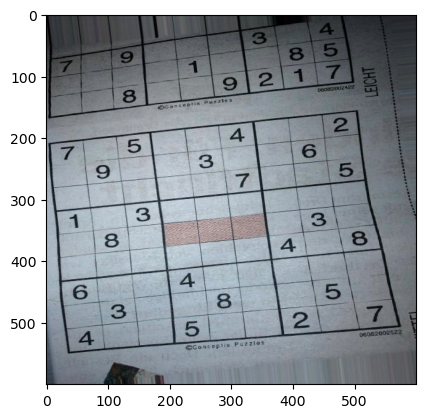

In [22]:
# Randomly select an image from the dataset 

folder=r"./sudokus/aug"

a=random.choice(os.listdir(folder))
print(a)
sudoku_a = cv2.imread(folder+'/'+a)
plt.figure()
plt.imshow(sudoku_a)
plt.show() 

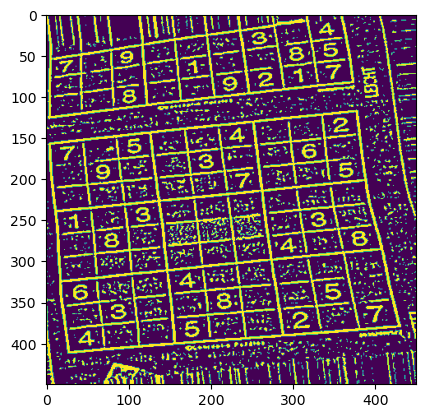

In [23]:
#Preprocessing image to be read
sudoku_a = cv2.resize(sudoku_a, (450,450))

# function to greyscale, blur and change the receptive threshold of image
def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray, (3,3),6) 
    #blur = cv2.bilateralFilter(gray,9,75,75)
    threshold_img = cv2.adaptiveThreshold(blur,255,1,1,11,2)
    return threshold_img

threshold = preprocess(sudoku_a)

#let's look at what we have got
plt.figure()
plt.imshow(threshold)
plt.show()

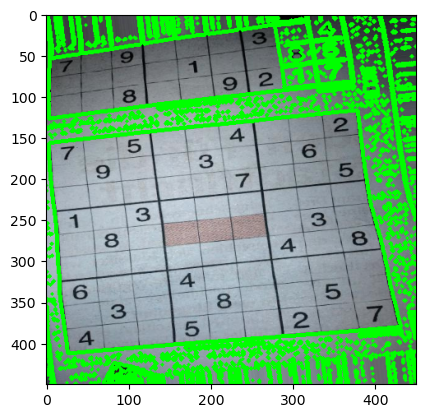

In [24]:
# Finding the outline of the sudoku puzzle in the image
contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()
contour, hierarchy = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour,-1,(0,255,0),3)

#let's see what we got
plt.figure()
plt.imshow(contour_1)
plt.show()

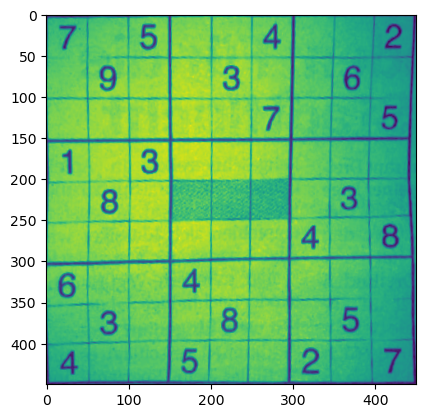

In [25]:
def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:
        area = cv2.contourArea(i)
        if area >50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i , 0.02* peri, True)
            if area > max_area and len(approx) ==4:
                biggest = approx
                max_area = area
    return biggest ,max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4,1,2),dtype = np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis =1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new

def splitcells(img):
    rows = np.vsplit(img,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes


black_img = np.zeros((450,450,3), np.uint8)
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
    biggest = reframe(biggest)
    cv2.drawContours(contour_2,biggest,-1, (0,255,0),10)
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    matrix = cv2.getPerspectiveTransform(pts1,pts2)  
    imagewrap = cv2.warpPerspective(sudoku_a,matrix,(450,450))
    imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)
    
plt.figure()
plt.imshow(imagewrap)
plt.show()

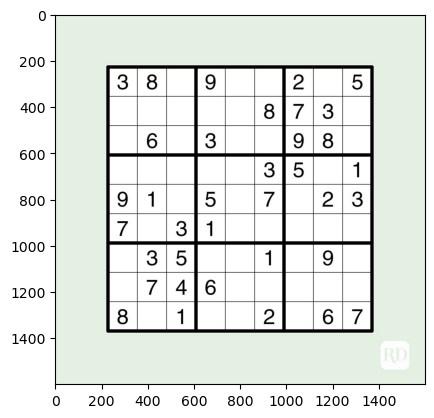

In [28]:
# Importing puzzle to be solved
puzzle = cv2.imread("./sudoku puzzle/su.jpg")

#let's see what we got
plt.figure()
plt.imshow(puzzle)
plt.show()

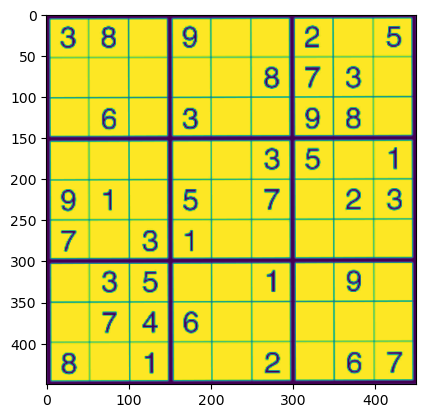

In [29]:
# Resizing puzzle to be solved
puzzle = cv2.resize(puzzle, (450,450))
# Preprocessing Puzzle 
su_puzzle = preprocess(puzzle)

# Finding the outline of the sudoku puzzle in the image
su_contour_1= su_puzzle.copy()
su_contour_2= sudoku_a.copy()
su_contour, hierarchy = cv2.findContours(su_puzzle,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(su_contour_1, su_contour,-1,(0,255,0),3)

black_img = np.zeros((450,450,3), np.uint8)
su_biggest, su_maxArea = main_outline(su_contour)
if su_biggest.size != 0:
    su_biggest = reframe(su_biggest)
    cv2.drawContours(su_contour_2,su_biggest,-1, (0,255,0),10)
    su_pts1 = np.float32(su_biggest)
    su_pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    su_matrix = cv2.getPerspectiveTransform(su_pts1,su_pts2)  
    su_imagewrap = cv2.warpPerspective(puzzle,su_matrix,(450,450))
    su_imagewrap =cv2.cvtColor(su_imagewrap, cv2.COLOR_BGR2GRAY)
    
plt.figure()
plt.imshow(su_imagewrap)
plt.show()

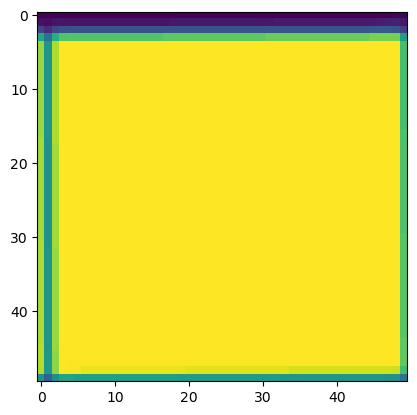

In [30]:
sudoku_cell = splitcells(su_imagewrap)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell[58])
plt.show()

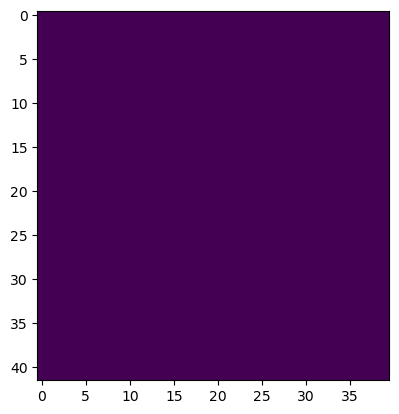

In [31]:
# The sudoku_cell's output includes the boundaries this could lead to misclassifications by the model 
# I am cropping the cells to avoid that
# sneeking in a bit of PIL lib as cv2 was giving some weird error that i couldn't ward off

def CropCell(cells):
    Cells_croped = []
    for image in cells:
        
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        Cells_croped.append(img)
        
    return Cells_croped

sudoku_cell_croped= CropCell(sudoku_cell)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell_croped[58])
plt.show()


In [47]:
def read_cells(cell,model):

    result = []
    for image in cell:
        # preprocess the image as it was in the model 
        img = np.asarray(image)
        img = img[4:img.shape[0] - 4, 4:img.shape[1] -4]
        img = cv2.resize(img, (32, 32))
        img = img / 255
        img = img.reshape(1, 32, 32, 1)
        # getting predictions and setting the values if probabilities are above 65% 
        
        predictions = model.predict(img)
        #classIndex = model.predict_classes(img)
        classes_x=np.argmax(predictions,axis=1)
        probabilityValue = np.amax(predictions)
        
        if probabilityValue > 0.65:
            result.append(classes_x[0])
        else:
            result.append(0)
    return result

In [48]:
grid = read_cells(sudoku_cell_croped, model)

1/1 [==============================] - 0s 12ms/step


In [53]:
grid = np.asarray(grid).reshape(9,9)

In [54]:
grid

array([[3, 8, 0, 9, 0, 0, 2, 0, 5],
       [0, 0, 0, 0, 0, 8, 7, 3, 0],
       [0, 6, 0, 3, 0, 0, 9, 8, 0],
       [0, 0, 0, 0, 0, 3, 5, 0, 1],
       [9, 1, 0, 5, 0, 7, 0, 2, 3],
       [7, 0, 3, 1, 0, 0, 0, 0, 0],
       [0, 3, 5, 0, 0, 1, 0, 9, 0],
       [0, 7, 4, 6, 0, 0, 0, 0, 0],
       [8, 0, 1, 0, 0, 2, 0, 6, 7]], dtype=int64)

In [58]:
# Solution #1
#This function finds the next box to solve 

def next_box(quiz):
    for row in range(9):
        for col in range(9):
            if quiz[row][col] == 0:
                return (row, col)
    return False

#Function to fill in the possible values by evaluating rows collumns and smaller cells

def possible (quiz,row, col, n):
    #global quiz
    for i in range (0,9):
        if quiz[row][i] == n and row != i:
            return False
    for i in range (0,9):
        if quiz[i][col] == n and col != i:
            return False
        
    row0 = (row)//3
    col0 = (col)//3
    for i in range(row0*3, row0*3 + 3):
        for j in range(col0*3, col0*3 + 3):
            if quiz[i][j]==n and (i,j) != (row, col):
                return False
    return True

#Recursion function to loop over untill a valid answer is found. 

def solve(quiz):
    val = next_box(quiz)
    if val is False:
        return True
    else:
        row, col = val
        for n in range(1,10): #n is the possible solution
            if possible(quiz,row, col, n):
                quiz[row][col]=n
                if solve(quiz):
                    return True 
                else:
                    quiz[row][col]=0
        return 
    
def Solved(quiz):
    for row in range(9):
        if row % 3 == 0 and row != 0:
            print("....................")

        for col in range(9):
            if col % 3 == 0 and col != 0:
                print("|", end=" ")

            if col == 8:
                print(quiz[row][col])
            else:
                print(str(quiz[row][col]) + " ", end="")
                
            

In [55]:
# Solution #2
def printSudoku(a):
    for i in range(9):
        print(a[i])        
 
def checkNumberInCol(grid, col, number):
    for i in range(0, 9):
        if grid[i][col] == number:
            return True
    return False

def checkNumberInRow(grid, row, number):
    for i in range(0, 9):
        if grid[row][i] == number:
            return True
    return False
    
def checkNumberInBox(grid, startRow, startCol, number):
    for i in range(startRow,startRow+3):
        for j in range(startCol,startCol+3):
            if grid[i][j] == number:
                return True
    return False

def isValidPlace(grid, row, col, num):
    return not (checkNumberInCol(grid, col, num) or checkNumberInRow(grid, row, num) or checkNumberInBox(grid, row - row%3 , col - col%3, num))
    
    
def Suduko(grid, row, col):
 
    if (row == 8 and col == 9):
        return True
    if col == 9:
        row += 1
        col = 0
    if grid[row][col] > 0:
        return Suduko(grid, row, col + 1)
    for num in range(1, 9 + 1, 1): 
     
        if isValidPlace(grid, row, col, num):
         
            grid[row][col] = num
            if Suduko(grid, row, col + 1):
                return True
        grid[row][col] = 0
    return False
    

In [56]:
if (Suduko(grid, 0, 0)):
    printSudoku(grid)
else:
    print("Solution does not exist:(")

[3 8 7 9 6 4 2 1 5]
[5 4 9 2 1 8 7 3 6]
[1 6 2 3 7 5 9 8 4]
[4 2 6 8 9 3 5 7 1]
[9 1 8 5 4 7 6 2 3]
[7 5 3 1 2 6 8 4 9]
[6 3 5 7 8 1 4 9 2]
[2 7 4 6 3 9 1 5 8]
[8 9 1 4 5 2 3 6 7]


In [59]:
if solve(grid):
    Solved(grid)
else:
    print("Solution don't exist. Model misread digits.")

3 8 7 | 9 6 4 | 2 1 5
5 4 9 | 2 1 8 | 7 3 6
1 6 2 | 3 7 5 | 9 8 4
....................
4 2 6 | 8 9 3 | 5 7 1
9 1 8 | 5 4 7 | 6 2 3
7 5 3 | 1 2 6 | 8 4 9
....................
6 3 5 | 7 8 1 | 4 9 2
2 7 4 | 6 3 9 | 1 5 8
8 9 1 | 4 5 2 | 3 6 7
